### Generation of a random sequence of 2N bits m(t)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import cmath
Pi = math.pi

N = 64
T = 1
arr = np.random.randint(2, size=(2*N,))
o = [i for i in range(0,128)]

In [2]:
arr #Random 128 bits

#overwrite random bits (example in slide)

s = '10001100110110011110010110111011100100111100011011100011100010000001010000001011110111010001011011110000111001001000001111111101'
arr2 = []
for x in s:
    arr2.append(int(x))
arr = np.array(arr2)


### Plot the bit pattern

In [3]:
def plot_bit_pattern(bits, yaxis):
    plt.figure(figsize=(12, 3), dpi=80)
    
    plt.grid(b=True, which='major', color='#666666', linestyle='-', linewidth=0.3)

    # Show the minor grid lines with very faint and almost transparent grey lines
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', linewidth=0.4)


    plt.xlabel('t', fontsize=15)
    plt.ylabel(yaxis, fontsize=15)
    plt.step(o[:N], bits[:N])
    plt.savefig("bit_pattern"+yaxis+'.eps')

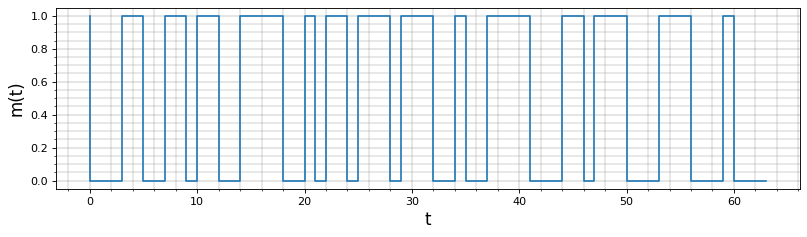

In [4]:
plot_bit_pattern(arr,'m(t)')

## Generate N QPSK symbols from the bit stream

In [5]:
bitsToQPSK= [[(1+1j),(-1+1j)],[(-1-1j),(1-1j)]] #Default Mapper

x = []
for i in range(0,N*2,2):
    b1 = arr[i]
    b2 = arr[i+1]
    
    x.append(bitsToQPSK[b1][b2])
    
for l in x:
    print(l, end=', ')
    
x_I = [symbol.real for symbol in x] #Real      part of x
x_Q = [symbol.imag for symbol in x] #Imaginary part of x

(-1-1j), (1+1j), (1-1j), (1+1j), (1-1j), (-1+1j), (-1-1j), (-1+1j), (1-1j), (-1-1j), (-1+1j), (-1+1j), (-1-1j), (1-1j), (-1-1j), (1-1j), (-1-1j), (-1+1j), (1+1j), (1-1j), (1-1j), (1+1j), (-1+1j), (-1-1j), (1-1j), (-1-1j), (1+1j), (1-1j), (-1-1j), (1+1j), (-1-1j), (1+1j), (1+1j), (-1+1j), (-1+1j), (1+1j), (1+1j), (1+1j), (-1-1j), (1-1j), (1-1j), (-1+1j), (1-1j), (-1+1j), (1+1j), (-1+1j), (-1+1j), (-1-1j), (1-1j), (1-1j), (1+1j), (1+1j), (1-1j), (-1-1j), (-1+1j), (1+1j), (-1-1j), (1+1j), (1+1j), (1-1j), (1-1j), (1-1j), (1-1j), (-1+1j), 

### Generate s(t)

In [6]:
def s_t(t):
    temp = []
    for k in range(0,len(x)):
        angle = t*2*Pi*k/(N*T)
        
        temp.append(x[k]*cmath.exp(1j*angle))
        
    s = 1/math.sqrt(N*T)
    return sum(temp)*s

### Plots for I(t) & Q(t)

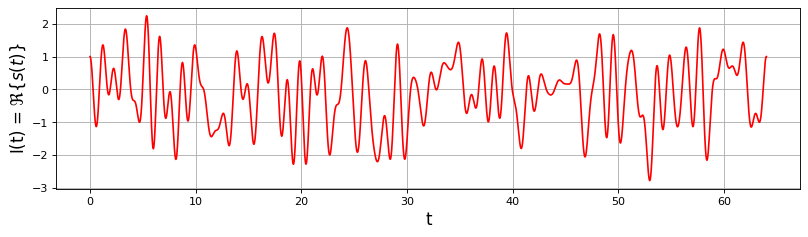

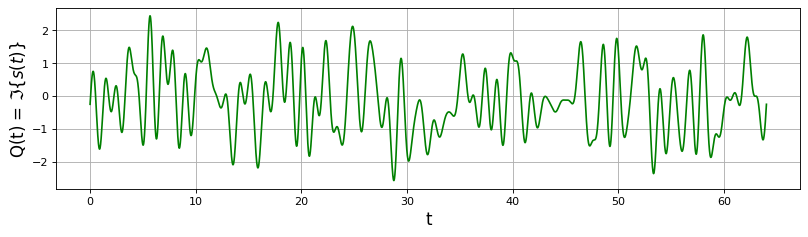

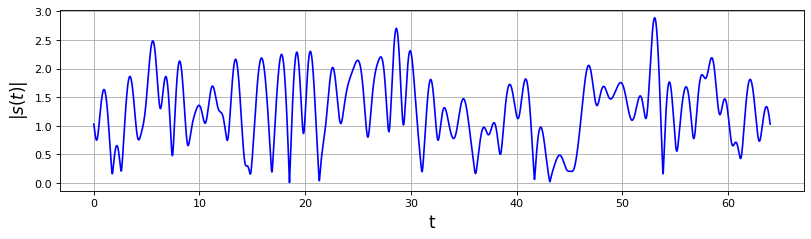

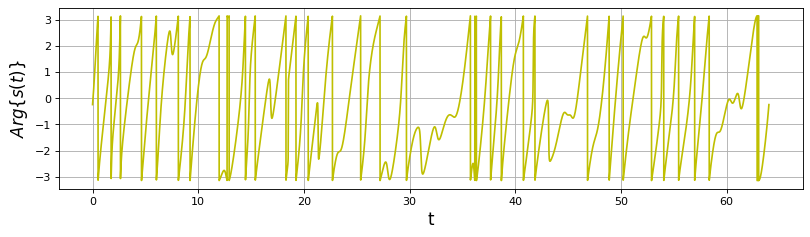

In [7]:
I_ = []
Q_ = []


S_abs = []
S_angle = []

o = [i for i in range(0,128)]


xcoord=[]
xcoord2=[]

for i in np.linspace(0,N,10000): # continous points
    xcoord.append(i)
    
    elem = s_t(i)
    
    S_abs.append(abs(elem))         #||
    S_angle.append(np.angle(elem))  #Arg
    I_.append(elem.real) #real
    Q_.append(elem.imag) #imaginary
    
### PLot Real part
plt.figure(figsize=(12, 3), dpi=80) 
plt.grid(True)
plt.plot(xcoord,I_,'r')
plt.xlabel('t', fontsize=15)
plt.ylabel('I(t) = $\Re \{s( t)\}$', fontsize=15)
plt.savefig("2_I(t).eps")

### PLot Real part
plt.figure(figsize=(12, 3), dpi=80)
plt.grid(True)
plt.plot(xcoord,Q_,'g')
plt.xlabel('t', fontsize=15)
plt.ylabel('Q(t) = $\Im \{s( t)\}$', fontsize=15)
plt.savefig("3_Q(t).eps")

### PLot Abs 
plt.figure(figsize=(12, 3), dpi=80)
plt.grid(True)
plt.plot(xcoord,S_abs,'b')
plt.xlabel('t', fontsize=15)
plt.ylabel('$|s( t)|$', fontsize=15)
plt.savefig("4_|s(t)|.eps")

### PLot Angle
plt.figure(figsize=(12, 3), dpi=80)
plt.grid(True)
plt.plot(xcoord,S_angle,'y')
plt.xlabel('t', fontsize=15)
plt.ylabel('$Arg\{s( t)\}$', fontsize=15)
plt.savefig("5_Arg{s(t)}.eps")



### Plots $\Re\{s( mT)\}= I(mT)\quad$      and     $\quad \Im\{s( mT)\} = Q(mT)$

/Users/ramith/Documents/170221T/Semester 4/EN2550 - Image Processing/img-processing-env/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ramith/Documents/170221T/Semester 4/EN2550 - Image Processing/img-processing-env/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


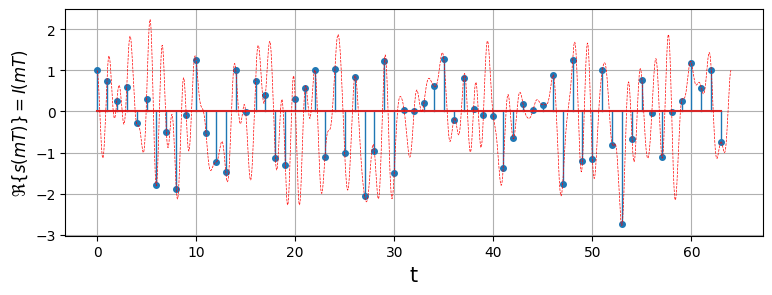

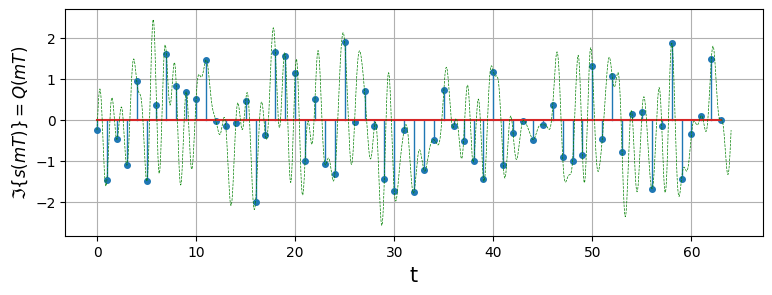

In [8]:
I_d = []
Q_d = []
S_d = []
S_d_abs = []
S_d_angle = []
xcoord2 =[]

for i in np.linspace(0,N-1,N): # discrete points
    xcoord2.append(i)
    
    elem = s_t(i)
    
    S_d.append(elem)
    S_d_abs.append(abs(elem))
    S_d_angle.append(np.angle(elem))  #Arg
    I_d.append(elem.real)
    Q_d.append(elem.imag)



#discrete real part 
plt.figure(figsize=(9, 3), dpi=100)
plt.grid(True)
plt.xlabel('t', fontsize=15)
plt.ylabel('$\Re\{s( mT)\}= I(mT)$', fontsize=12)
markerline, stemlines, baseline = plt.stem(xcoord2,I_d)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 4)
plt.plot(xcoord,I_,'r--',linewidth=0.5)  ### along with continous
plt.savefig("6_Re{s(mT)}.eps")

#discrete imag part 
plt.figure(figsize=(9, 3), dpi=100)
plt.grid(True)
plt.xlabel('t', fontsize=15)
plt.ylabel('$\Im\{s( mT)\} = Q(mT)$', fontsize=12)
markerline, stemlines, baseline = plt.stem(xcoord2,Q_d)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 4)
plt.plot(xcoord,Q_,'g--',linewidth=0.5)  ### along with continous
plt.savefig("8_Im{s(mT)}.eps")

### Plot $|s(mT)| = \sqrt{I^{2}( mT) \ +\ Q^{2}( mT)}$

/Users/ramith/Documents/170221T/Semester 4/EN2550 - Image Processing/img-processing-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


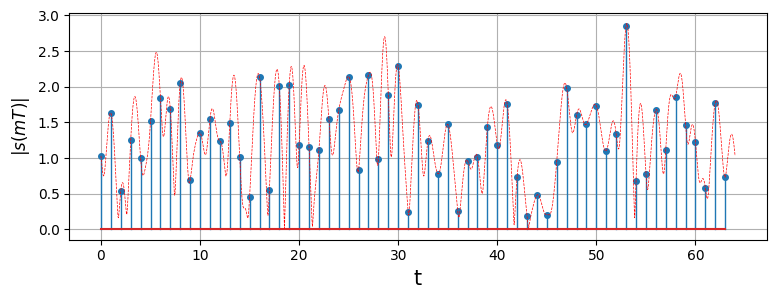

In [9]:
plt.figure(figsize=(9, 3), dpi=100)
plt.grid(True)
plt.xlabel('t', fontsize=15)
plt.ylabel('$|s(mT)|$', fontsize=12)
markerline, stemlines, baseline = plt.stem(xcoord2,S_d_abs)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 4)
plt.plot(xcoord,S_abs,'r--',linewidth=0.5)  ### along with continous
plt.savefig("10_|s(mT)|.eps")

### Plot $Arg\{s( t)\}$

/Users/ramith/Documents/170221T/Semester 4/EN2550 - Image Processing/img-processing-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


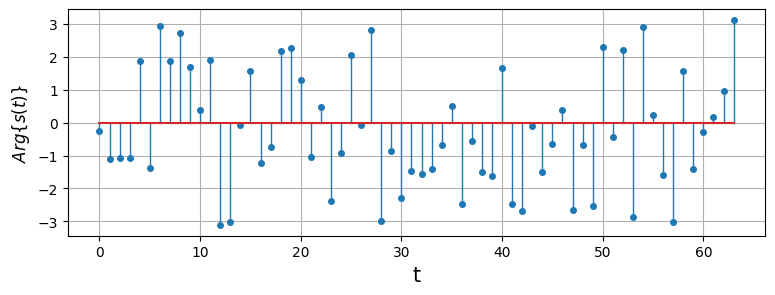

In [10]:
plt.figure(figsize=(9, 3), dpi=100)
plt.grid(True)
plt.xlabel('t', fontsize=15)
plt.ylabel('$Arg\{s( t)\}$', fontsize=12)
markerline, stemlines, baseline = plt.stem(xcoord2,S_d_angle)
plt.setp(stemlines, 'linewidth', 1)
plt.setp(markerline, markersize = 4)
#plt.plot(xcoord,S_angle,'r--',linewidth=0.5)  ### along with continous
plt.savefig("12_Arg{s(mT)}.eps")

# Recovered Signal

In [11]:
def recover(s,l):
    temp = []
    for m in range(0,len(s)):
        angle = l*2*Pi*m/(N)
        
        temp.append(s[m]*cmath.exp(-1j*angle))
        
    f = math.sqrt(T)/math.sqrt(N)
    return sum(temp)*f

In [12]:
QPSKToBits= [[],[[],[0,0],[1,1]],[[],[0,1],[1,0]]] #Inverse Mapper

In [13]:
recovered = []

for i in range(0,N):
    elem = recover(S_d,i)
    recovered.append(QPSKToBits[round(elem.real)][round(elem.imag)])
    
recovered = [item for sublist in recovered for item in sublist]

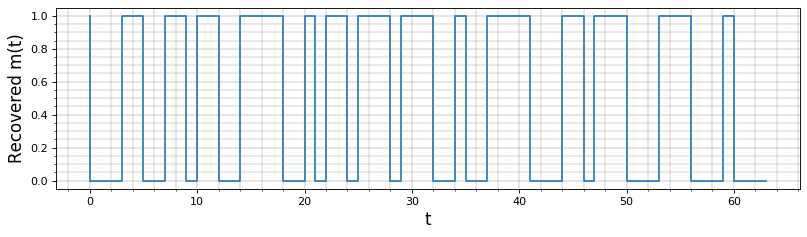

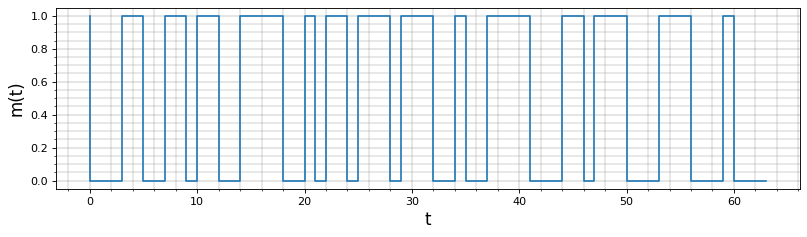

In [14]:
plot_bit_pattern(recovered,'Recovered m(t)')
plot_bit_pattern(arr,'m(t)')